# Airqdata: analysis tools for air quality data

Notebook version with output and functional links: [https://nbviewer.jupyter.org/gist/dr-1/450c275b1ad2cbf88e9c4325c5d032bc](https://nbviewer.jupyter.org/gist/dr-1/450c275b1ad2cbf88e9c4325c5d032bc)

**Table of contents**  
[InfluencAir / Luftdaten.info resources](#InfluencAir-/-Luftdaten.info-resources)  
[Irceline.be resources](#Irceline.be-resources)  
[Combining the sources](#Combining-the-sources)

In [3]:
%matplotlib inline

In [4]:
%run airqdata
pd.set_option("display.max_rows", 10)

## InfluencAir / Luftdaten.info resources

### Download list of sensors from InfluencAir's Google Sheet

In [5]:
influencair.Metadata(refresh_cache=True)
sensor_info = influencair.Metadata.sensors
sensor_info.head(4)

,Chip ID,PM Sensor ID,Hum/Temp Sensor ID,Label,Address,Floor,Side
0,4021549,3445,NaN,NaN,"Avenue Princesse Elisabeth 28, Schaarbeek",2,Street
1,4022301,3803,NaN,NaN,"Rue Brogniez, Anderlecht",2,Street
2,4020466,3805,NaN,NaN,"Rue de l'Équateur, Uccle",NaN,Garden
3,4018142,3893,3894,Cinquantenaire I,"Avenue de la Renaissance 10, Bruxelles",4,Street


In [6]:
len(sensor_info)

50

### Create a Sensor object and get the sensor's metadata and current measurements

In [7]:
# PM sensor at Brussels Central Station
demo_sensor_id = "5561"
demo_sensor = influencair.Sensor(demo_sensor_id, refresh_cache=True)

In [8]:
demo_sensor.influencair_metadata

Chip ID                      956245
Label      Brussels Central Station
Address             Central station
Floor                             2
Side                         Street
Name: 10, dtype: object

In [9]:
demo_sensor.luftdaten_metadata

id                                    868571610
location.altitude                          33.9
location.country                             BE
location.id                                2804
location.latitude                        50.846
                                       ...     
sensor.id                                  5561
sensor.pin                                    1
sensor.sensor_type.id                        14
sensor.sensor_type.manufacturer    Nova Fitness
sensor.sensor_type.name                  SDS011
Name: metadata, Length: 12, dtype: object

In [10]:
demo_sensor.luftdaten_metadata_url

'https://api.luftdaten.info/v1/sensor/5561/'

In [53]:
demo_sensor.current_measurements

{'pm10': 75.03, 'pm2.5': 38.42}

### Open data history graphs of the sensor in a browser

In [12]:
demo_sensor.open_madavi_graphs()

### Retrieve data history
Data are retrieved from cache or server and then cleaned.

In [54]:
demo_sensor.get_measurements(start_date="2018-02-27", end_date="2018-03-02")

### Inspect, summarize and plot data

In [55]:
demo_sensor.measurements

,pm10,pm2.5
timestamp,,
2018-02-27 00:00:40+00:00,6.95,6.50
2018-02-27 00:03:07+00:00,6.78,6.28
2018-02-27 00:05:34+00:00,6.45,5.95
2018-02-27 00:08:01+00:00,8.13,7.28
2018-02-27 00:10:29+00:00,7.47,6.87
...,...,...
2018-03-02 23:49:50+00:00,112.55,50.12
2018-03-02 23:52:17+00:00,108.72,47.72
2018-03-02 23:54:45+00:00,108.20,54.55


In [56]:
describe(demo_sensor.measurements)

,pm10,pm2.5
count,2098.00,2098.00
mean,24.52,12.63
std,26.39,11.18
min,2.45,2.00
1%,3.10,2.80
50%,17.85,10.13
99%,117.34,51.88
max,134.57,58.95


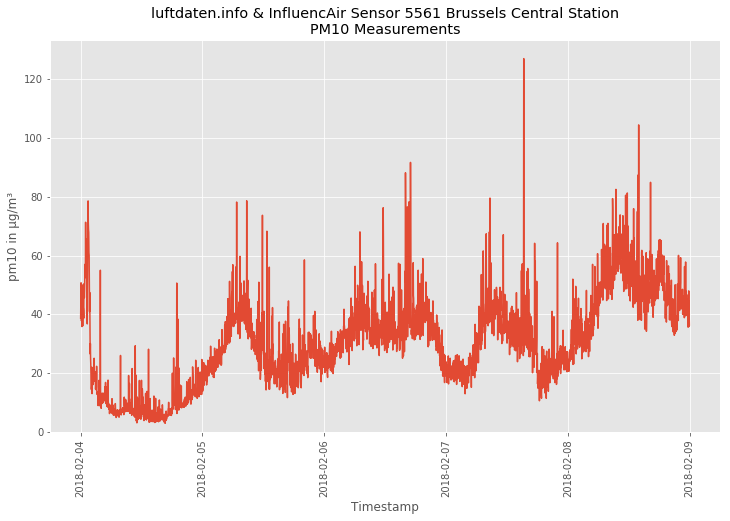

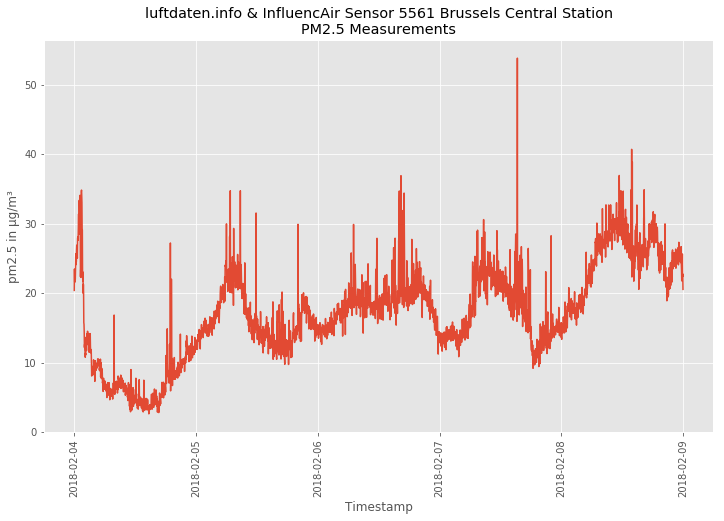

([<matplotlib.figure.Figure at 0x10cf436d8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1077579b0>])

In [16]:
demo_sensor.plot_measurements()

### Inspect, summarize and plot hourly means

In [17]:
demo_sensor.get_hourly_means()

,pm10,pm2.5
Period,,
2018-02-04 00:00,45.39,25.58
2018-02-04 01:00,53.93,26.17
2018-02-04 02:00,18.44,12.84
2018-02-04 03:00,14.55,10.26
2018-02-04 04:00,11.55,9.61
...,...,...
2018-02-08 19:00,46.58,25.29
2018-02-08 20:00,41.01,22.93
2018-02-08 21:00,40.88,22.59


In [18]:
describe(demo_sensor.get_hourly_means())

,pm10,pm2.5
count,120.00,120.00
mean,30.71,17.23
std,14.15,6.44
min,5.07,3.79
1%,5.35,4.00
50%,31.91,17.65
99%,60.01,29.68
max,60.90,29.91


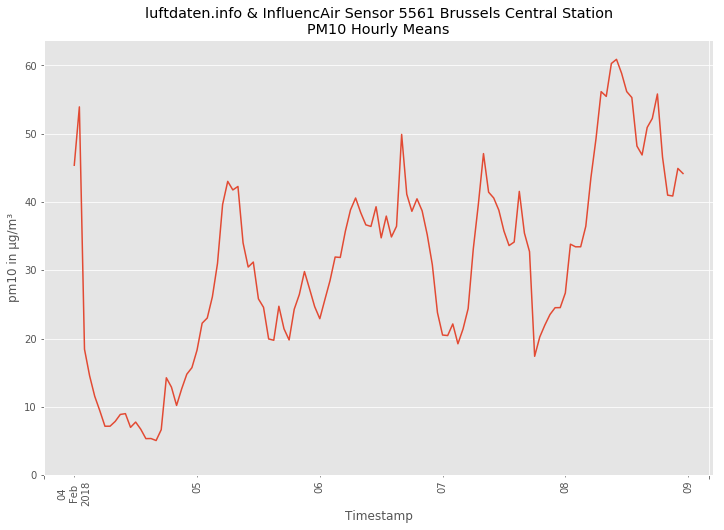

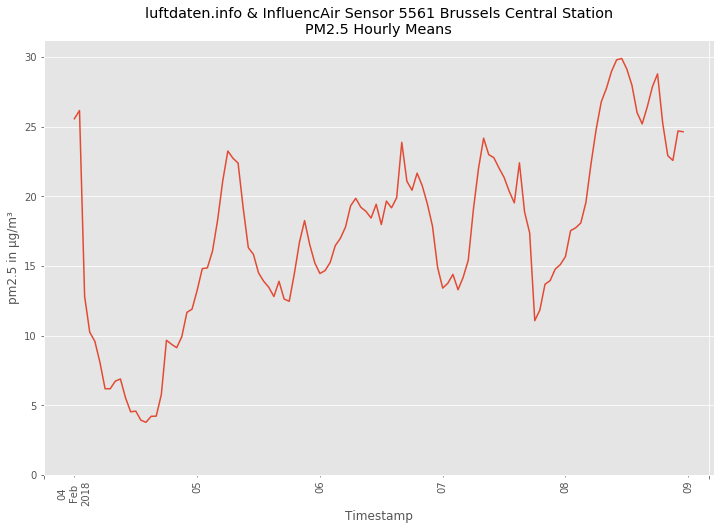

([<matplotlib.figure.Figure at 0x10ebdcf98>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10ebf8780>])

In [19]:
demo_sensor.plot_hourly_means()

### Check distribution of sample intervals
Time series analyses tend to be easier with regularly spaced intervals. How many data points per interval length do we have?

In [20]:
demo_sensor.intervals.head(10)

00:02:27    1235
00:02:28     740
00:02:29     279
00:02:26     193
00:02:30     125
00:02:31      69
00:02:35      41
00:02:34      33
00:02:32      31
00:02:36      22
Name: timestamp, dtype: int64

### List sensors near a given location

Defaults to searching within an 8 kilometer radius around the center of Brussels

In [21]:
luftdaten.search_proximity()

,sensor_type,latitude,longitude,distance
sensor_id,,,,
8866,DHT22,50.85,4.35,0.45
8865,HPM,50.85,4.35,0.45
5561,SDS011,50.85,4.36,0.48
5562,DHT22,50.85,4.36,0.48
7097,DHT22,50.85,4.34,0.84
...,...,...,...,...
3445,SDS011,50.87,4.38,3.23
5830,DHT22,50.83,4.39,3.29
5829,SDS011,50.83,4.39,3.29


Sensors near Antwerp

In [22]:
luftdaten.search_proximity(lat=51.22, lon=4.41, radius=10)

,sensor_type,latitude,longitude,distance
sensor_id,,,,
5937,SDS011,51.22,4.41,0.24
5938,DHT22,51.22,4.41,0.24
2588,SDS011,51.20,4.44,3.10
2589,DHT22,51.20,4.44,3.10
7454,SDS011,51.21,4.45,3.24
...,...,...,...,...
10100,SDS011,51.26,4.44,4.60
6085,SDS011,51.23,4.48,4.75
9496,SDS011,51.27,4.46,6.45


No data for sensor 4879
No data for sensor 5829
No data for sensor 7899
No data for sensor 9498


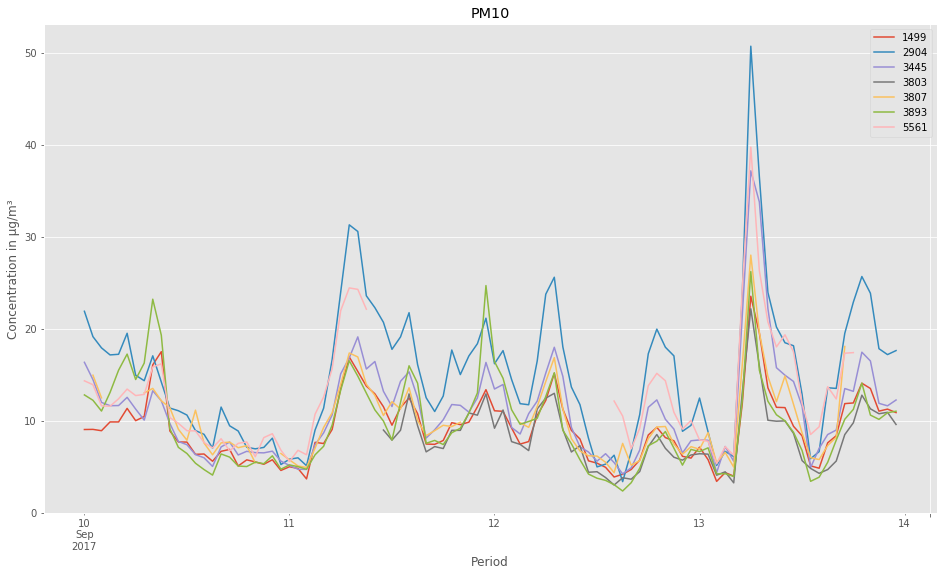

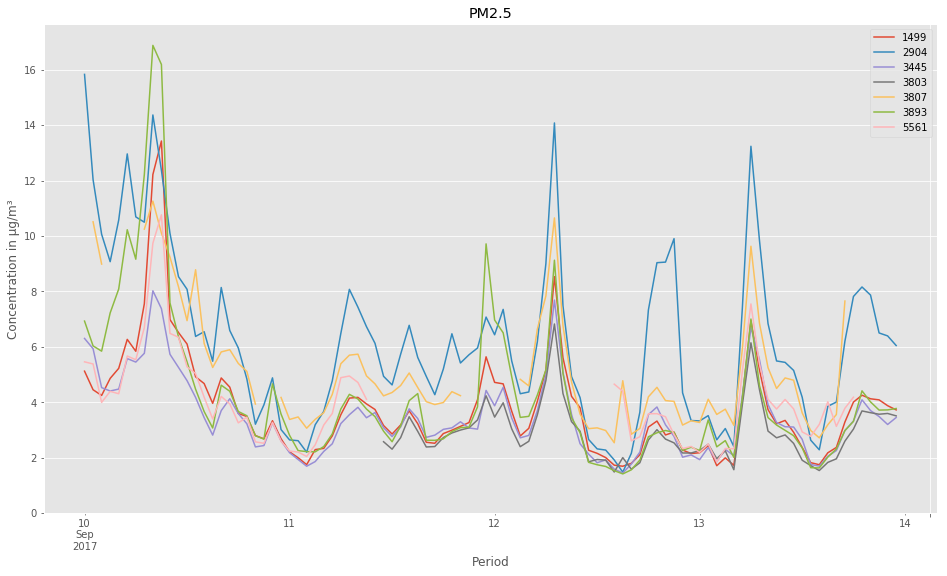

In [23]:
(near_sensors,
 hourly_means) = luftdaten.evaluate_near_sensors(start_date="2017-09-10",
                                                 end_date="2017-09-13",
                                                 quiet=True)

In [24]:
hourly_means

pm10                                           pm2.5  \
                   1499   2904   3445   3803   3807   3893   5561  1499   
Period                                                                    
2017-09-10 00:00   9.08  21.92  16.38    NaN    NaN  12.84  14.37  5.13   
2017-09-10 01:00   9.10  19.16  14.50    NaN  14.98  12.26  13.95  4.45   
2017-09-10 02:00   8.95  17.95  12.03    NaN  12.52  11.09  11.66  4.25   
2017-09-10 03:00   9.91  17.18  11.67    NaN    NaN  13.10  11.61  4.86   
2017-09-10 04:00   9.91  17.25  11.69    NaN    NaN  15.52  12.42  5.23   
...                 ...    ...    ...    ...    ...    ...    ...   ...   
2017-09-13 19:00  14.11  25.69  17.48  12.81    NaN  14.12    NaN  4.26   
2017-09-13 20:00  13.54  23.88  16.52  11.33    NaN  10.65    NaN  4.13   
2017-09-13 21:00  11.08  17.86  11.93  10.80    NaN  10.19    NaN  4.09   
2017-09-13 22:00  11.30  17.22  11.66  10.95    NaN  10.90    NaN  3.88   
2017-09-13 23:00  10.92  17.65  12.29   9.63    NaN  11.07    NaN  3.73   

                                                        
                   2904  3445  3803   3807  3893  5561  
Period                                                  
2017-09-10 00:00  15.83  6.31   NaN    NaN  6.93  5.46  
2017-09-10 01:00  12.04  5.94   NaN  10.52  6.04  5.38  
2017-09-10 02:00  10.07  4.53   NaN   8.99  5.85  4.00  
2017-09-10 03:00   9.08  4.41   NaN    NaN  7.23  4.40  
2017-09-10 04:00  10.58  4.48   NaN    NaN  8.09  4.31  
...                 ...   ...   ...    ...   ...   ...  
2017-09-13 19:00   8.16  4.09  3.69    NaN  4.42   NaN  
2017-09-13 20:00   7.87  3.70  3.63    NaN  4.02   NaN  
2017-09-13 21:00   6.50  3.49  3.57    NaN  3.72   NaN  
2017-09-13 22:00   6.40  3.20  3.60    NaN  3.73   NaN  
2017-09-13 23:00   6.05  3.45  3.51    NaN  3.78   NaN  

[96 rows x 14 columns]

## Irceline.be resources

### Get IRCELINE metadata about phenomena and stations

In [25]:
irceline.Metadata()

In [26]:
irceline.Metadata.phenomena

,label
id,
1,Sulphur dioxide
5,Particulate Matter < 10 µm
7,Ozone
8,Nitrogen dioxide
10,Carbon Monoxide
...,...
6001,Particulate Matter < 2.5 µm
6002,Particulate Matter < 1 µm
61102,wind direction


In [27]:
irceline.Metadata.stations

,label,lat,lon
id,,,
1030,40AL01 - LINKEROEVER,51.24,4.39
1031,40AL02 - BEVEREN,51.30,4.23
1032,40AL03 - BEVEREN,51.25,4.20
1033,40AL04 - BEVEREN,51.29,4.29
1034,40AL05 - BEVEREN,51.26,4.28
...,...,...,...
1240,47E715 - ZUIENKERKE,51.25,3.17
1241,47E716 - MARIAKERKE,51.07,3.68
1242,47E804 - Kallo,51.28,4.31


In [28]:
irceline.Metadata.get_stations_by_name("bru")

,label,lat,lon
id,,,
1110,41B004 - Bruxelles (Sainte-Catherine),50.85,4.35
1112,41B006 - Bruxelles (Parlement UE),50.84,4.37
1711,41B008 - Brussel (Beliardstraat),50.84,4.38


In [29]:
irceline.Metadata.time_series

,label,phenomenon,unit,station_id,station_label,station_lat,station_lon
id,,,,,,,
6522,"1,2-XYLENE O-XYLENE 6522 - btx, o-xyleen - pro...","1,2-XYLENE O-XYLENE",µg/m³,1112,41B006 - Bruxelles (Parlement UE),50.84,4.37
6202,"Benzene 6202 - ? - procedure, 40GK09 - GENK",Benzene,µg/m³,1045,40GK09 - GENK,50.93,5.49
6274,"Benzene 6274 - Synspec - procedure, 40LD01 - L...",Benzene,µg/m³,1058,40LD01 - LAAKDAL,51.11,5.00
6283,"Benzene 6283 - Synspec - procedure, 40LD02 - L...",Benzene,µg/m³,1059,40LD02 - LAAKDAL,51.12,5.02
6487,Benzene 6487 - Airmotec 10000S plus benzeen - ...,Benzene,µg/m³,1107,40ZL01 - ZELZATE,51.20,3.81
...,...,...,...,...,...,...,...
99904,wind speed (scalar) 99904 - Unknown device - p...,wind speed (scalar),m/s,1198,44M705 - ROESELARE,50.95,3.15
99907,wind speed (scalar) 99907 - Unknown device - p...,wind speed (scalar),m/s,1207,44R701 - GENT,51.06,3.73
99910,wind speed (scalar) 99910 - Unknown device - p...,wind speed (scalar),m/s,1127,42M802 - ANTWERPEN,51.26,4.42


### How many stations measure a given phenomenon?

In [30]:
irceline.Metadata.time_series["phenomenon"].value_counts()

Nitrogen dioxide               91
Nitrogen monoxide              91
Particulate Matter < 10 µm     66
Particulate Matter < 2.5 µm    64
Sulphur dioxide                53
                               ..
Ethylbenzene                    1
Toluene                         1
Particulate Matter < 1 µm       1
M+P-xylene                      1
1,2-XYLENE O-XYLENE             1
Name: phenomenon, Length: 19, dtype: int64

### How many phenomena does a given station measure?

In [31]:
irceline.Metadata.time_series["station_label"].value_counts().head()

44R701 - GENT                    12
41R001 - Molenbeek-Saint-Jean    11
44N029 - HOUTEM                  11
41R012 - UCCLE                   11
42R801 - BORGERHOUT               9
Name: station_label, dtype: int64

In [32]:
pd.set_option("display.max_rows", 6)

### Where is a given phenomenon measured?

In [33]:
irceline.Metadata.query_time_series(phenomenon="ethylbenzene")

,label,phenomenon,unit,station_id,station_label,station_lat,station_lon
id,,,,,,,
6521,"Ethylbenzene 6521 - btx, ethylbenzeen - proced...",Ethylbenzene,µg/m³,1112,41B006 - Bruxelles (Parlement UE),50.84,4.37


### Where is PM2.5 measured?

In [34]:
irceline.Metadata.get_pm25_time_series()

,label,phenomenon,unit,station_id,station_label,station_lat,station_lon
id,,,,,,,
100001,Particulate Matter < 2.5 µm 100001 - Unknown d...,Particulate Matter < 2.5 µm,µg/m³,1044,40GK06 - GENK,50.93,5.47
100005,Particulate Matter < 2.5 µm 100005 - Unknown d...,Particulate Matter < 2.5 µm,µg/m³,1070,40RL01 - ROESELARE,50.95,3.12
100006,Particulate Matter < 2.5 µm 100006 - Unknown d...,Particulate Matter < 2.5 µm,µg/m³,1066,40OB01 - OOSTROZEBEK,50.92,3.31
...,...,...,...,...,...,...,...
99997,Particulate Matter < 2.5 µm 99997 - Unknown de...,Particulate Matter < 2.5 µm,µg/m³,1200,44N012 - MOERKERKE,51.25,3.36
99998,Particulate Matter < 2.5 µm 99998 - Unknown de...,Particulate Matter < 2.5 µm,µg/m³,1208,44R710 - DESTELBERGE,51.06,3.78
99999,Particulate Matter < 2.5 µm 99999 - Unknown de...,Particulate Matter < 2.5 µm,µg/m³,1048,40HB23 - HOBOKEN,51.17,4.34


### Where is PM10 measured?

In [35]:
irceline.Metadata.get_pm10_time_series()

,label,phenomenon,unit,station_id,station_label,station_lat,station_lon
id,,,,,,,
10600,Particulate Matter < 10 µm 10600 - - procedur...,Particulate Matter < 10 µm,µg/m³,1159,42R831 - BERENDRECHT,51.35,4.34
10610,Particulate Matter < 10 µm 10610 - Unknown dev...,Particulate Matter < 10 µm,µg/m³,1710,42R834 - Boom,51.09,4.38
10680,Particulate Matter < 10 µm 10680 - Unknown dev...,Particulate Matter < 10 µm,µg/m³,1714,40OB02 - Wielsbeke,50.91,3.38
...,...,...,...,...,...,...,...
7148,Particulate Matter < 10 µm 7148 - GRIMM - proc...,Particulate Matter < 10 µm,µg/m³,1219,45R510 - CHATELINEAU,50.42,4.52
7151,Particulate Matter < 10 µm 7151 - GRIMM - proc...,Particulate Matter < 10 µm,µg/m³,1220,45R511 - MARCINELLE,50.38,4.42
7162,Particulate Matter < 10 µm 7162 - GRIMM - proc...,Particulate Matter < 10 µm,µg/m³,1221,45R512 - MARCHIENNE,50.41,4.40


### What are the closest locations to Etterbeek where IRCELINE measures NO₂?
Using a location in Etterbeek as a reference point: 50.837°N 4.39°E

In [36]:
irceline.Metadata.query_time_series("nitrogen dioxide", lat_nearest=50.837, lon_nearest=4.39)

,label,phenomenon,unit,station_id,station_label,station_lat,station_lon,distance
id,,,,,,,,
10614,Nitrogen dioxide 10614 - Unknown device - proc...,Nitrogen dioxide,µg/m³,1711,41B008 - Brussel (Beliardstraat),50.84,4.38,1.06
6516,Nitrogen dioxide 6516 - AC-31M (Environnement)...,Nitrogen dioxide,µg/m³,1112,41B006 - Bruxelles (Parlement UE),50.84,4.37,1.11
6615,Nitrogen dioxide 6615 - AC-31M (Environnement)...,Nitrogen dioxide,µg/m³,1119,41R002 - Ixelles,50.83,4.38,1.37
...,...,...,...,...,...,...,...,...
7047,"Nitrogen dioxide 7047 - THIS 42C - procedure, ...",Nitrogen dioxide,µg/m³,1202,44N029 - HOUTEM,51.02,2.58,128.25
6934,Nitrogen dioxide 6934 - API 200A 1849 - proced...,Nitrogen dioxide,µg/m³,1180,43N085 - VIELSALM,50.30,6.00,128.37
6968,Nitrogen dioxide 6968 - Unknown device - proce...,Nitrogen dioxide,µg/m³,1185,43N132 - Habay-La-Neuve,49.72,5.63,152.36


### What does the Uccle station measure?

In [37]:
irceline.Metadata.list_station_time_series("ucc")

,label,phenomenon,unit,station_id,station_label
id,,,,,
10607,"Black Carbon 10607 - - procedure, 41R012 - UCCLE",Black Carbon,µg/m³,1122,41R012 - UCCLE
6619,Carbon Dioxide 6619 - This model 41H - procedu...,Carbon Dioxide,ppm,1122,41R012 - UCCLE
6622,Nitrogen dioxide 6622 - AC-31M (Environnement)...,Nitrogen dioxide,µg/m³,1122,41R012 - UCCLE
...,...,...,...,...,...
99941,temperature 99941 - Unknown device - procedure...,temperature,°C,1122,41R012 - UCCLE
99939,wind direction 99939 - Unknown device - proced...,wind direction,degrees,1122,41R012 - UCCLE
99940,wind speed (scalar) 99940 - Unknown device - p...,wind speed (scalar),m/s,1122,41R012 - UCCLE


### List stations near a location
Defaults to coordinates and radius of Brussels

In [38]:
irceline.Metadata.search_proximity(lat=50.9, lon=4.4, radius=5)

,label,lat,lon,distance
id,,,,
1116,41MEU1 - MEUDON,50.90,4.39,0.75
1117,41N043 - HAREN,50.88,4.38,2.18
1232,47E008 - Grimbergen,50.93,4.40,2.92
1143,42R010 - Sint-Stevens-Woluwe,50.87,4.43,4.36


### Create a sensor object from a time series, retrieve its measurements and plot them

In [39]:
irceline_demo_sensor = irceline.Sensor("6615")  # An NO₂ sensor in Ixelles

In [40]:
irceline_demo_sensor.get_measurements(start_date="2018-02-03", end_date="2018-02-08")

In [41]:
irceline_demo_sensor.measurements.head()

,Nitrogen dioxide
Period,
2018-02-03 00:00,74.5
2018-02-03 01:00,76.0
2018-02-03 02:00,63.5
2018-02-03 03:00,56.0
2018-02-03 04:00,49.0


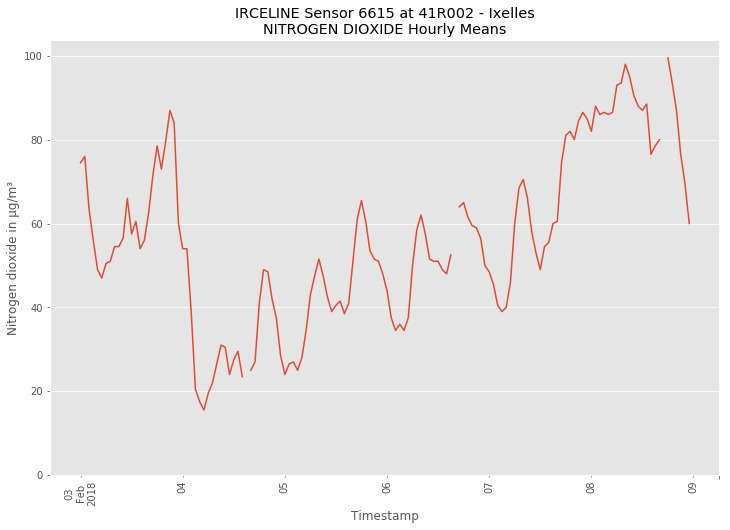

([<matplotlib.figure.Figure at 0x1120c4198>],
 [<matplotlib.axes._subplots.AxesSubplot at 0x111ffeb00>])

In [42]:
irceline_demo_sensor.plot_measurements()

## Combining the sources

In [43]:
pd.set_option("display.max_rows", 10)

### Which are the closest IRCELINE sensors to a given luftdaten.info sensor that measure the same phenomenon?

In [44]:
nearest = irceline.find_nearest_sensors(demo_sensor, quiet=True)
nearest

,pm10,pm2.5
time series id,6578,6579
label,Particulate Matter < 10 µm 6578 - TEOM FDMS - ...,Particulate Matter < 2.5 µm 6579 - TEOM FDMS -...
phenomenon,Particulate Matter < 10 µm,Particulate Matter < 2.5 µm
unit,µg/m³,µg/m³
station_id,1118,1118
station_label,41R001 - Molenbeek-Saint-Jean,41R001 - Molenbeek-Saint-Jean
station_lat,51,51
station_lon,4.3,4.3
distance,1.7,1.7


### Compare data of a luftdaten.info sensor and the nearest IRCELINE sensors

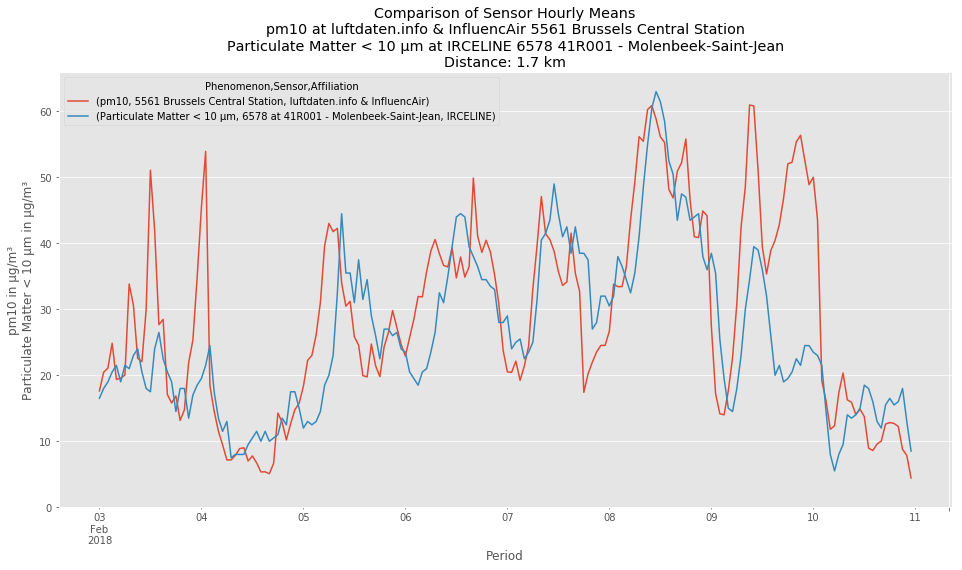

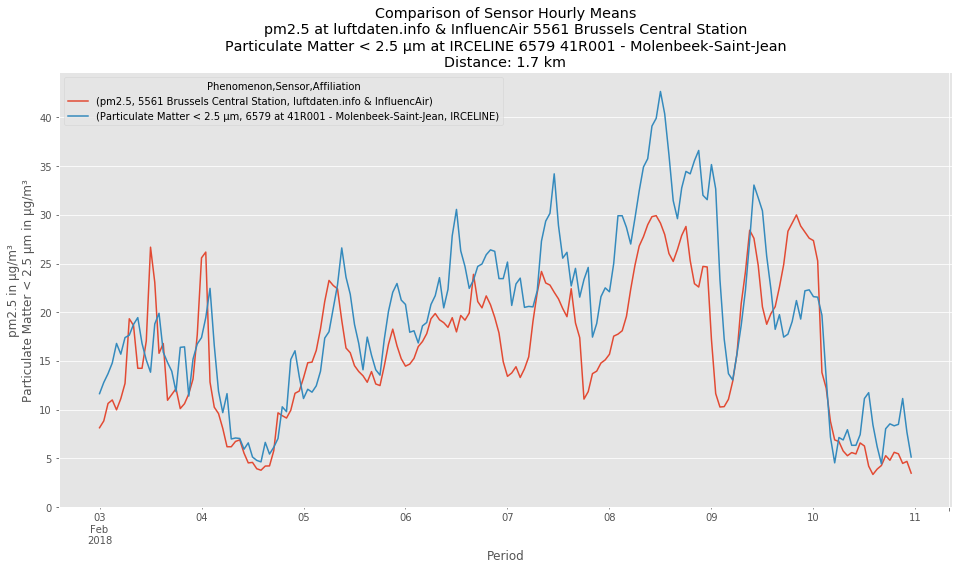

In [45]:
combined_data, plots = compare_nearest_irceline_sensors(demo_sensor,
                                                        start_date="2018-02-03", end_date="2018-02-10",
                                                        quiet=True)

#### Correlation between the compared values

In [46]:
combined_data.corr()

,,Phenomenon,pm10,Particulate Matter < 10 µm,pm2.5,Particulate Matter < 2.5 µm
,,Sensor,5561 Brussels Central Station,6578 at 41R001 - Molenbeek-Saint-Jean,5561 Brussels Central Station,6579 at 41R001 - Molenbeek-Saint-Jean
,,Affiliation,luftdaten.info & InfluencAir,IRCELINE,luftdaten.info & InfluencAir,IRCELINE
Phenomenon,Sensor,Affiliation,,,,
pm10,5561 Brussels Central Station,luftdaten.info & InfluencAir,1.00,0.70,0.98,0.77
Particulate Matter < 10 µm,6578 at 41R001 - Molenbeek-Saint-Jean,IRCELINE,0.70,1.00,0.70,0.93
pm2.5,5561 Brussels Central Station,luftdaten.info & InfluencAir,0.98,0.70,1.00,0.80
Particulate Matter < 2.5 µm,6579 at 41R001 - Molenbeek-Saint-Jean,IRCELINE,0.77,0.93,0.80,1.00


### Compare data from any sensors

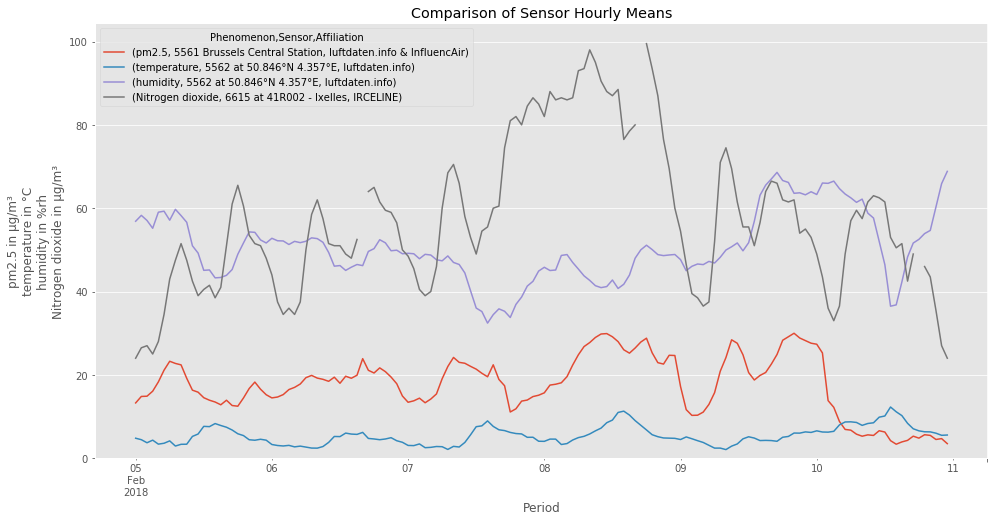

In [47]:
t_rh_sensor = luftdaten.Sensor("5562")  # Temperature and humidity sensor at Brussels Central Station
combined_data, plot = compare_sensor_data(sensors=[demo_sensor, t_rh_sensor, t_rh_sensor, irceline_demo_sensor],
                                          phenomena=["pm2.5", "temperature", "humidity", "Nitrogen dioxide"],
                                          start_date="2018-02-05", end_date="2018-02-10",
                                          hourly_means=True,
                                          quiet=True)

In [48]:
combined_data.head()

Phenomenon,pm2.5,temperature,humidity,Nitrogen dioxide
Sensor,5561 Brussels Central Station,5562 at 50.846°N 4.357°E,5562 at 50.846°N 4.357°E,6615 at 41R002 - Ixelles
Affiliation,luftdaten.info & InfluencAir,luftdaten.info,luftdaten.info,IRCELINE
Period,,,,
2018-02-05 00:00,13.27,4.80,56.87,24.0
2018-02-05 01:00,14.82,4.44,58.28,26.5
2018-02-05 02:00,14.88,3.71,57.06,27.0
2018-02-05 03:00,16.08,4.33,55.18,25.0
2018-02-05 04:00,18.31,3.38,59.04,28.0


#### Correlation between the compared values

In [49]:
combined_data.corr()

,,Phenomenon,pm2.5,temperature,humidity,Nitrogen dioxide
,,Sensor,5561 Brussels Central Station,5562 at 50.846°N 4.357°E,5562 at 50.846°N 4.357°E,6615 at 41R002 - Ixelles
,,Affiliation,luftdaten.info & InfluencAir,luftdaten.info,luftdaten.info,IRCELINE
Phenomenon,Sensor,Affiliation,,,,
pm2.5,5561 Brussels Central Station,luftdaten.info & InfluencAir,1.00,-0.21,-0.03,0.47
temperature,5562 at 50.846°N 4.357°E,luftdaten.info,-0.21,1.00,-0.21,0.15
humidity,5562 at 50.846°N 4.357°E,luftdaten.info,-0.03,-0.21,1.00,-0.38
Nitrogen dioxide,6615 at 41R002 - Ixelles,IRCELINE,0.47,0.15,-0.38,1.00


## Export data for use in another environment

In [50]:
# demo_sensor.measurements.to_csv("demo_sensor_data.csv")